# Les optimisations de type "Pricing"

# Introduction

Ces optimisations permettent de calculer le meilleur prix à appliquer pour un produit afin de maximiser le profit de l'entreprise.

Elles sont inspirées du livre sous Excel :  Wayne_L._Winston_S._Christian_Albright_Practical_Management_Science livre / Optimisations non linéaires.

J'ai codé la version linéaire. Puis la solution avec l'équation d'élasticité de la demande ,avec l'aide de John Hedengren sur Stack Overflow, le résultat est strictement le même que la version sous Excel du livre de Wayne L Winston.

Avec le temps, j'espère étendre ce notebook.

**** Création en cours ****

Etude globale proposée par <b>Estelle Derrien - Github Estelle15000</b>


# Sommaire

- 1. <b>Elaborer le meilleur prix d'un objet avec l'équation linéaire de la demande.</b>
        - Notre problème de base
           - l'équation linéaire de la demande
        - Résolution avec Python Gekko
- 2. <b>Elaborer le meilleur prix d'un objet avec l'équation d'élasticité de la demande.</b>
        - l'équation d'élasticité non linéaire de la demande
        - Résolution avec Python Gekko    
- 2. <b>Elaborer le meilleur prix de plusieurs objets en même temps.</b>
        - Notre problème de base
           - Notre problème de base
        - Modélisation mathématique
        - Résolution

# 1 Elaborer le meilleur prix d'un objet avec l'équation linéaire de la demande.

## Notre problème de base:

La société M fabrique et vend un produit x.

L'entreprise veut pour déterminer le prix qui maximise son profit de ce produit. 

Le coût unitaire de production et de commercialisation du produit est de 50 euros. 

M facturera certainement au moins 50 Euros pour le produit pour s'assurer qu'il génère des bénéfices, et donc s'assurer du seuil de rentabilité (Break even en Anglais). 

Cependant, il existe un marché très concurrentiel pour ce produit, de sorte que la demande de M chute fortement lorsqu'elle augmente son prix. 

- Problème original sous Excel :  Wayne_L._Winston_S._Christian_Albright_Practical_Management_Science livre / Optimisations non linéaires.

## Optimiser à l'aide de l'équation linéaire de la demande


Le service commercial nous a fournit l'équation linéaire de la demande pour l'objet.

Pour cela, il ont fourni 2 points - estimations, ce qui permet d'établir l'équation linéaire de la demande : 

- Prix : 70 euros / demande 400 - Quand le prix est de 70 euros, la demande est de 400 unités
- Prix : 80 euros / demande 300 - Quand le prix est de 80 euros, la demande est de 300 unités

On voit bien sur le schéma la réaction des clients à l'augmentation du prix, qui est quantifiée, mathématiquement.


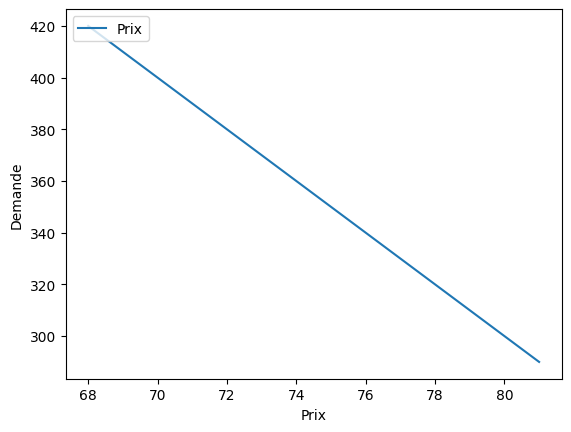

In [11]:
import matplotlib.pyplot as plt
import math

# On définit l'étendue (range)
x_cords = range(68,82)

# On définit les fonctions.
prix_lineaires_objet_A = [- 10 * x + 1100  for x in x_cords] 

# On trace
plt.plot(x_cords,prix_lineaires_objet_A, label="Prix")

plt.xlabel("Prix")
plt.ylabel("Demande")
plt.legend(loc="upper left")
plt.show()

# Calculer le meilleur prix avec Gekko Solver

Maintenant, on va utiliser Gekko Solveur pour calculer le meilleur prix à appliquer.

Lr solveur trouve un prix maximisé de 80 euros à appliquer 

In [12]:
from gekko import GEKKO

# Initialiser Gekko
m = GEKKO(remote=False) 

#The example problem that you referenced uses the default IPOPT solver. To get a binary or integer solution, switch to the APOPT solver.
m.options.SOLVER = 1

# Cette variable de décision va contenir le meilleur prix pour l'objet
p1 = m.Var(integer=False)

# x1  va contenir l'equation de la demande 
x1 = m.Var(integer=False)

m.Equation(x1 == 1100 - 10 * p1)

m.Maximize((p1 - 50) * x1) 

m.options.IMODE = 3 # Steady state optimization

# On résouds
m.solve(disp=False) # Solve 

print('Solution')
print('x1: ' + str(p1.value))
print('Objectif Profit: ' + str(-m.options.objfcnval))


Solution
x1: [80.0]
Objectif Profit: 9000.0


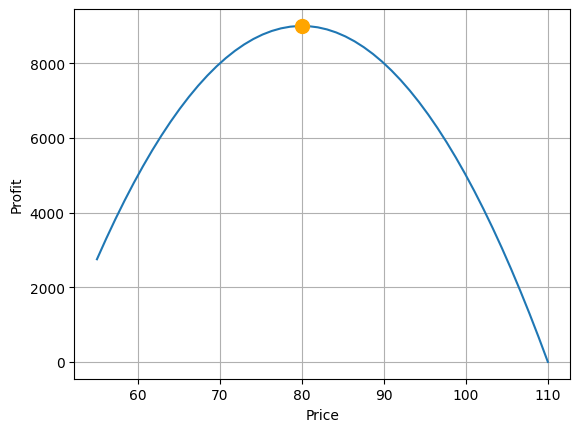

In [13]:
# view profit versus price solution
import numpy as np
import matplotlib.pyplot as plt
px = np.linspace(55,110)
dx = 1100 - 10 * px
profit = (px-50)*dx
plt.plot(px,profit)

plt.plot(p1.value,-m.options.objfcnval,'o',markersize=10,color='orange')
plt.grid(); plt.xlabel('Price'); plt.ylabel('Profit')
plt.show()

# 2. Elaborer le meilleur prix d'un objet avec l'équation d'élasticité de la demande.

L'équation d'élasticité de la demande est plus réaliste.

Le service commercial nous l'a fourni :

<b>y = 4E + 0.6 * x exposant - 2.154 </b>

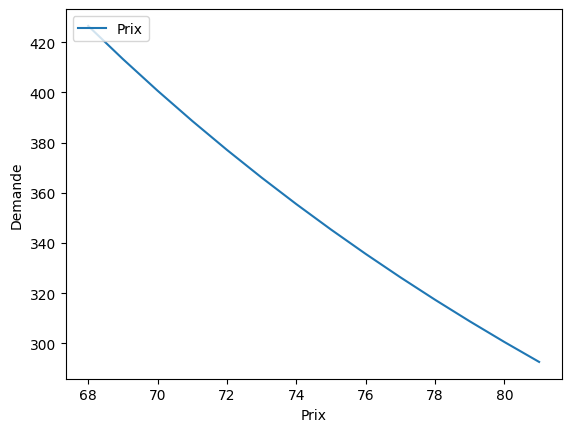

In [14]:
import matplotlib.pyplot as plt

# On définit l'étendue (range)
x_cords = range(68,82)

# On définit les fonctions.
equation_elasticité = [3.777178e6*x**(-2.154)  for x in x_cords] 

# On trace
plt.plot(x_cords,equation_elasticité, label="Prix")

plt.xlabel("Prix")
plt.ylabel("Demande")
plt.legend(loc="upper left")
plt.show()

# Résolution avec Gekko

Le résultat est exactement le même que celui du livre de Wayne Winston , sous  Excel, ne reste plus qu'au servce commercial de fournir une équation d'élasticité de la demande, pour obtenir un Pricing qui colle au plus proche du nécessaire !

In [15]:
from gekko import GEKKO
m = GEKKO()

p = m.Var(lb=50)  # price
d = m.Var(lb=100) # demand
m.Equation(d == 3.777178e6*p**(-2.154))
m.Maximize((p-50)*d)

m.solve(disp=False)
print('Solution')
price = p.value[0]
obj = -m.options.objfcnval
print(f'Price: {price:0.2f}')
print(f'Profit: {obj:0.2f}')



In [ ]:
# view profit versus price solution
import numpy as np
import matplotlib.pyplot as plt
px = np.linspace(55,110)
dx = 3.777178e6*px**(-2.154)
profit = (px-50)*dx
plt.plot(px,profit)
plt.plot(price,obj,'o',markersize=10,color='orange')
plt.grid(); plt.xlabel('Price'); plt.ylabel('Profit')
plt.show()